In [ ]:
import pandas as pd

# データ読み込み
dataset = pd.read_excel("dataset-uci 2.xls")

# 'Obesity (%)' 列を削除（axis=1は列を指定）
dataset = dataset.drop(columns=['Obesity (%)'])

# 23番目のデータ（index=22）を削除（axis=0は行を指定）
dataset = dataset.drop(index=23)

# 結果確認（任意）
print(dataset.head())

   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High Density Lipoprotein (HDL)  Triglyceride  \


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values

In [ ]:
# 기존 설치 패키지 제거
!pip uninstall scikit-learn -y
!pip uninstall pycaret -y

# 완벽히 호환되는 최신 버전 설치 (2024년 4월 기준)
!pip install -U scikit-learn==1.4.2 pycaret==3.3.2 joblib==1.3.2


Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: pycaret 3.3.2
Uninstalling pycaret-3.3.2:
  Successfully uninstalled pycaret-3.3.2
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from time import time

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x787025bfd8a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


In [ ]:
import sklearn
sklearn.set_config(enable_metadata_routing=False)

In [ ]:
cell_start_time = time()
clf = setup(data = dataset, target='Gallstone Status',train_size=0.7, normalize=True, fix_imbalance=True)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Description,Value
0,Session id,2670
1,Target,Gallstone Status
2,Target type,Binary
3,Original data shape,"(318, 38)"
4,Transformed data shape,"(320, 38)"
5,Transformed train set shape,"(224, 38)"
6,Transformed test set shape,"(96, 38)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


CELL RUN TIME :  7.90625


In [ ]:
cell_start_time = time()
top5_models = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.815,0.901,0.755,0.859,0.802,0.630,0.636,1.726
ridge,Ridge Classifier,0.802,0.893,0.718,0.861,0.779,0.603,0.614,0.052
lda,Linear Discriminant Analysis,0.793,0.886,0.718,0.845,0.770,0.584,0.596,0.052
et,Extra Trees Classifier,0.802,0.886,0.818,0.790,0.803,0.603,0.605,0.200
svm,SVM - Linear Kernel,0.815,0.876,0.818,0.812,0.814,0.630,0.632,0.054
lightgbm,Light Gradient Boosting Machine,0.793,0.871,0.773,0.803,0.785,0.586,0.589,0.130
rf,Random Forest Classifier,0.793,0.856,0.764,0.808,0.782,0.586,0.590,0.254
ada,Ada Boost Classifier,0.757,0.853,0.709,0.792,0.741,0.514,0.523,0.236
xgboost,Extreme Gradient Boosting,0.784,0.853,0.782,0.783,0.779,0.568,0.572,0.152
gbc,Gradient Boosting Classifier,0.744,0.848,0.709,0.763,0.730,0.487,0.492,0.428


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

CELL RUN TIME :  26.63852095603943


In [ ]:
top5_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=2670, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=2670, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_s

In [ ]:
total_models = []
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
cell_start_time = time()
model_qda = create_model('qda', fold=5)
total_models.append(model_qda)
cell_end_time = time()
print("CELL RUN TIME : ", cell_end_time - cell_start_time)
model_qda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9289,0.6364,0.9333,0.7568,0.5970,0.6287
1,0.7556,0.7628,0.5909,0.8667,0.7027,0.5075,0.5344
2,0.8409,0.8058,0.8182,0.8571,0.8372,0.6818,0.6825
3,0.7273,0.8264,0.5909,0.8125,0.6842,0.4545,0.4725
4,0.7273,0.6983,0.5455,0.8571,0.6667,0.4545,0.4880
Mean,0.7702,0.8045,0.6364,0.8654,0.7295,0.5391,0.5612
Std,0.0442,0.0761,0.0953,0.0389,0.0617,0.0883,0.0815


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  0.7712304592132568


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

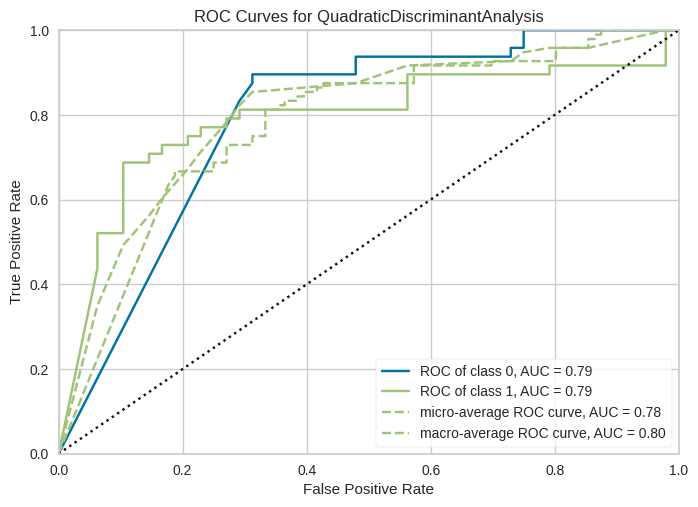

In [ ]:
plot_model(model_qda, plot='auc')

In [ ]:
cell_start_time = time()
model_lda = create_model('lda', fold=5)
total_models.append(model_lda)
cell_end_time = time()
print("CELL RUN TIME : ", cell_end_time - cell_start_time)
model_lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.9328,0.8182,0.9000,0.8571,0.7327,0.7356
1,0.7556,0.9427,0.5455,0.9231,0.6857,0.5065,0.5536
2,0.8864,0.9339,0.8636,0.9048,0.8837,0.7727,0.7735
3,0.7045,0.7851,0.6818,0.7143,0.6977,0.4091,0.4095
4,0.7500,0.8450,0.6364,0.8235,0.7179,0.5000,0.5134
Mean,0.7926,0.8879,0.7091,0.8531,0.7684,0.5842,0.5971
Std,0.0710,0.0625,0.1171,0.0773,0.0843,0.1424,0.1374


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  1.2314214706420898


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

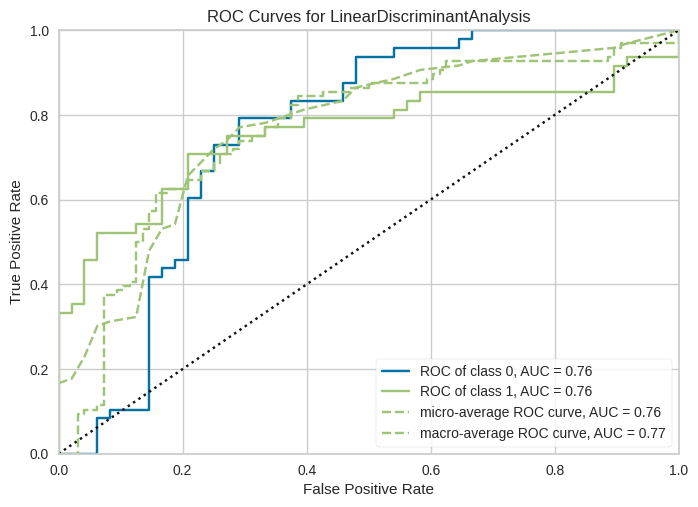

In [ ]:
plot_model(model_lda, plot='auc')

In [ ]:
cell_start_time = time()
model_lr = create_model('lr', fold=5)
total_models.append(model_lr)
cell_end_time = time()
print("CELL RUN TIME : ", cell_end_time - cell_start_time)
model_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.9407,0.8182,0.9000,0.8571,0.7327,0.7356
1,0.8444,0.8992,0.7273,0.9412,0.8205,0.6872,0.7050
2,0.8636,0.9194,0.8636,0.8636,0.8636,0.7273,0.7273
3,0.7500,0.8554,0.7273,0.7619,0.7442,0.5000,0.5005
4,0.8182,0.8926,0.7727,0.8500,0.8095,0.6364,0.6390
Mean,0.8286,0.9015,0.7818,0.8633,0.8190,0.6567,0.6615
Std,0.0429,0.0285,0.0530,0.0598,0.0427,0.0856,0.0873


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  0.7640926837921143


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2670, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

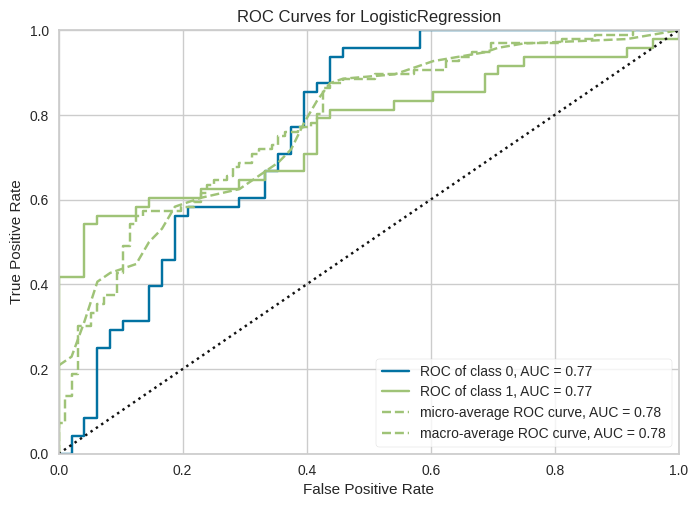

In [ ]:
plot_model(model_lr, plot='auc')

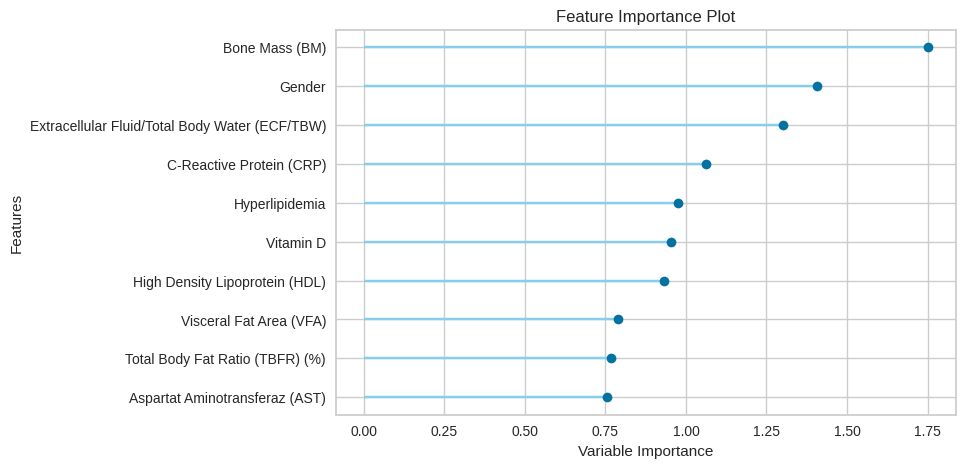

In [ ]:
plot_model(model_lr, plot='feature')

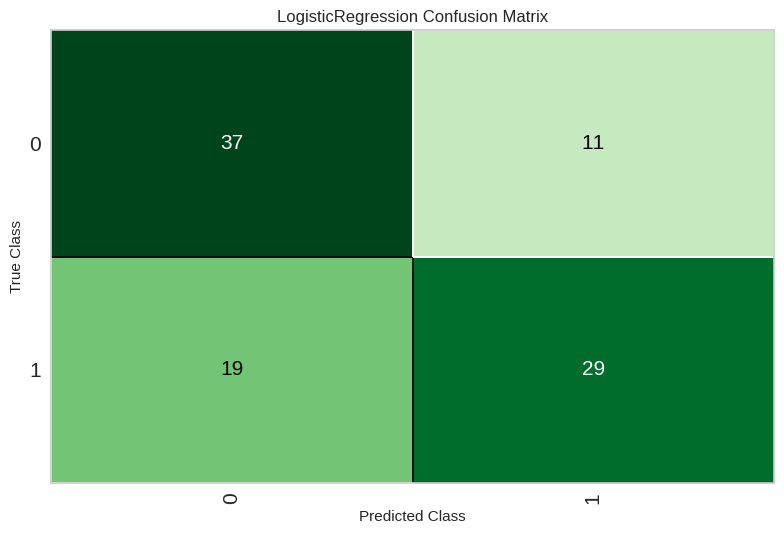

In [ ]:
plot_model(model_lr, plot = 'confusion_matrix')

In [ ]:
final_model = finalize_model(model_lr)

In [ ]:
import pandas as pd
import numpy as np

test_data = pd.DataFrame(np.random.rand(10, 37), columns=["Age", "Gender", 'Comorbidity', 'Coronary Artery Disease (CAD)',
                                                          'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)',
                                                          'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)',
                                                          'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)',
                                                          'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)',
                                                          'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Total Fat Content (TFC)',
                                                          'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)',
                                                          'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)',
                                                          'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)',
                                                          'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)',
                                                          'Vitamin D'])

# Print the DataFrame
print(test_data)


        Age    Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0  0.874234  0.046308     0.472788                       0.818452   
1  0.481160  0.144954     0.158314                       0.786905   
2  0.513533  0.887086     0.238123                       0.820113   
3  0.357849  0.857294     0.746815                       0.183831   
4  0.095129  0.004706     0.331749                       0.218119   
5  0.582381  0.679379     0.278558                       0.284285   
6  0.260812  0.176636     0.949963                       0.040007   
7  0.623848  0.912288     0.041707                       0.991701   
8  0.992737  0.896543     0.853689                       0.828276   
9  0.869283  0.085084     0.404897                       0.987364   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)    Height    Weight  \
0        0.054004        0.956811                0.985091  0.802410  0.221889   
1        0.787599        0.607392                0.691658  0.536214  0.014767 

In [ ]:
prediction = predict_model(final_model, data = test_data)
prediction.head()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D,prediction_label,prediction_score
0,0.874234,0.046308,0.472788,0.818452,0.054004,0.956811,0.985091,0.802410,0.221889,0.781819,...,0.188672,0.607897,0.789105,0.781237,0.008048,0.507713,0.649726,0.043961,1,1.0
1,0.481160,0.144954,0.158314,0.786905,0.787599,0.607392,0.691658,0.536214,0.014767,0.993265,...,0.645038,0.089009,0.231214,0.829944,0.544300,0.505106,0.345124,0.967140,1,1.0
2,0.513533,0.887086,0.238123,0.820113,0.491101,0.725429,0.721588,0.892146,0.696617,0.007699,...,0.417873,0.428812,0.399597,0.925134,0.935729,0.311282,0.061610,0.540883,1,1.0
3,0.357849,0.857294,0.746815,0.183831,0.813710,0.075574,0.839214,0.070045,0.774696,0.809166,...,0.412442,0.307811,0.399714,0.251523,0.186994,0.357558,0.721783,0.862062,1,1.0
4,0.095129,0.004706,0.331749,0.218119,0.868902,0.186334,0.436977,0.558781,0.731802,0.958770,...,0.583124,0.604548,0.356348,0.149595,0.844144,0.378280,0.227741,0.373843,1,1.0
